<p style="background-color:#3ab1c8;font-family:Cursive;font-size:200%;color:black;text-align:center;border-radius:120px 20px;padding:20px;margin:20px;"><b>Walmart Buy Box alma orani</b></p>

<p style="font-family:Cursive;font-size:100%;color:black;text-align:center;border-radius:10px 10px;"><b>by Nash</b></p>

<b style="font-family:Cursive;font-size:100%;color:black;text-align:right;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

Bu notebook ile Ime Brand sirketinin Walmart pazarinda satisa sundugu 1044 ürün ile ilgili bilgilerin bulundugu data setinden elde edilen bilgilerle olusuturulmus bir notebooktur. 

Bu notebookun amaci Sirketin Walmart pazari icin olusturdugu/tuttugu bazi bilgileri kullanarak, ürünün Boybox alma olasiligini belirleye bilmek.

Sunun net olarak bilinmesi gerekiyor ki, datasetinde Buy Box ile ilgili datasetinde yeterli veri olmadigi icin BU SONUCLAR GERCEGI YANSITMAMAKTADIR.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score

import joblib

import warnings
warnings.filterwarnings('ignore')

C:\Users\nsgr6\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
C:\Users\nsgr6\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Walmart_item_analyse.csv')
df.sample(2)

,Unnamed: 0,SKU,Product_Name,Product_Category,Price,Promo_Start_Date,Promo_End_Date,Comparison_Price,Comparison_Price_Type,Buy_Box_Item_Price,...,Primary_Category_Path,Brand,Offer_Start_Date,Offer_End_Date,Item_Creation_Date,Reviews_Count,Average_Rating,Competitor_Price,Competitor_Ship_Price,Cost
312,312,0850040682281-bstock-6.6,"Australian Botanical Soap, Goats Milk with She...","Beauty, Personal Care, & Hygiene",37.95,1970-01-01,1970-01-01,37.99,Was Price,37.99,...,"[""Home Page"",""Personal Care"",""Bath & Body"",""Ba...",Australian Botanical Soap,2023-11-27,2049-12-31,2023-10-06,4,5.0,23.0,0.0,15.18
392,392,080958409278-C-P-L2-91.98,EasyGo Product 5 Position Classic Lay Flat In...,Garden & Patio,165.15,1970-01-01,1970-01-01,124.99,Was Price,165.15,...,"[""Home Page"",""Patio & Garden"",""Patio Furniture...",EasyGo Products,2022-09-18,2049-12-31,2022-05-31,2,4.0,0.0,0.0,66.06


In [3]:
df["Buy_Box_Rate"] = 0
df.loc[df['Buy_Box_Item_Price'] == df['Price'], 'Buy_Box_Rate'] = 1
df.loc[df['Buy_Box_Item_Price'] > df['Price'], 'Buy_Box_Rate'] = 1

df.sample(2)

,Unnamed: 0,SKU,Product_Name,Product_Category,Price,Promo_Start_Date,Promo_End_Date,Comparison_Price,Comparison_Price_Type,Buy_Box_Item_Price,...,Brand,Offer_Start_Date,Offer_End_Date,Item_Creation_Date,Reviews_Count,Average_Rating,Competitor_Price,Competitor_Ship_Price,Cost,Buy_Box_Rate
157,157,188781000966-WM-BS-34.58,Zerowater 5-Stage Water Filter Replacement - 6...,"Home Decor, Kitchen, & Other",71.25,1970-01-01,1970-01-01,91.99,List Price,70.31,...,ZeroWater,2024-02-23,2049-12-31,2019-07-10,2325,4.5,70.31,0.0,28.500,0
531,531,073149108395-W-F-L1-6.74,Sterilite 10839006 3 Gallon Round Swing Top Pl...,"Home Decor, Kitchen, & Other",40.99,1970-01-01,1970-01-01,43.29,Was Price,40.99,...,Sterilite,2024-02-08,2049-12-31,2019-08-09,14,4.9,40.99,0.0,16.396,1


Buy Box Rate icin yeni bir sütun olusturuldu. Buy box fiyati ile Price degeri ayni olan ve kücük olan ürünler icin Buy box fiyati alindigi varsayilarak bu ürünler "1" olarak adlandirildi. Price degeri, Buy box fiyatindan büyük olan ürünler "0" olarak adlandirildi.

Model elde edilen sonuc 1 ise, Buy box alma ihtimalinin olumlu oldugu, 0 ise, Bu box alma ihtimalinin olumsuz oldugunu anlayabiliriz.

In [4]:
df["Buy_Box_Rate"].value_counts()

1    630
0    414
Name: Buy_Box_Rate, dtype: int64

katsayisi 0,5 ve üzerindeki sütunlari final modelde kullanmak icin tutup digerlerini düsürecegiz. onemli sütunlari belirleyip digerlerini düsürüp, modele en az veri girip en iyi sonucu almaya calisacagiz

In [5]:
df.drop(columns=['Unnamed: 0','SKU','Promo_Start_Date','Promo_End_Date','Primary_Category_Path','Item_Creation_Date', 
                 'Offer_Start_Date','Offer_End_Date','Product_Name','Product_Category','Comparison_Price',
                 'Buy_Box_Eligible', 'MSRP','Product_Tax_Code','WFS_Sales_Restriction','Shelf_Name', 'Brand',
                 'Reviews_Count', 'Competitor_Price', 'Competitor_Ship_Price'], inplace=True)

# split

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['Buy_Box_Rate'], axis=1)
y = df['Buy_Box_Rate']

scaler = StandardScaler()

y = pd.DataFrame(y)
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

(939, 8) (105, 8)


In [7]:
X.sample(2)

,Price,Comparison_Price_Type,Buy_Box_Item_Price,Ship_Methods,Shipping_Weight,Fulfillment_Type,Average_Rating,Cost
182,18.99,Was Price,18.99,ALWAYS_TWO_DAY,2.05,Walmart Fulfilled,0.0,7.596
622,39.99,Was Price,39.99,ALWAYS_TWO_DAY,3.35,WFS Eligible,4.3,15.996


En yüksek skorlari aldigimiz Logistic Regression modelini parametreleri ile final model olarak kullanacagiz.

In [8]:
# OrdinalEncoder ve StandardScaler transformer'ları
ordinal_features = ['Comparison_Price_Type','Ship_Methods', 'Fulfillment_Type']
                     
numeric_features = ['Price','Buy_Box_Item_Price','Shipping_Weight','Average_Rating','Cost']

ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numeric_transformer = StandardScaler()

# ColumnTransformer ile iki farklı transformer'ı birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_features),
        ('num', numeric_transformer, numeric_features)])

# Logistic Regression model ile pipeline oluşturma
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101,
                              solver="liblinear", penalty="l1"))])

# Modeli eğitim verisiyle eğitme
final_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Comparison_Price_Type',
                                                   'Ship_Methods',
                                                   'Fulfillment_Type']),
                                                 ('num', StandardScaler(),
                                                  ['Price',
                                                   'Buy_Box_Item_Price',
                                                   'Shipping_Weight',
                                                   'Average_Rating',
                                                   'Cost'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='liblinear'))])

In [9]:
def eval_metric(final_model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [10]:
# Tahminler yapma
y_pred = final_model.predict(X_test)
y_train_pred = final_model.predict(X_train)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçlari yazdirma
print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Kesinlik (Precision): {precision}")
print(f"Duyarlilik (Recall): {recall}")
print(f"F1 Skoru: {f1}")

# Daha ayrintili bir siniflandirma raporu
print("\nSiniflandirma Raporu:")
print("Test_Set")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print()
print("Train_Set")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Doğruluk (Accuracy): 0.9142857142857143
Kesinlik (Precision): 0.8787878787878788
Duyarlilik (Recall): 0.9830508474576272
F1 Skoru: 0.9279999999999999

Siniflandirma Raporu:
Test_Set
[[38  8]
 [ 1 58]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89        46
           1       0.88      0.98      0.93        59

    accuracy                           0.91       105
   macro avg       0.93      0.90      0.91       105
weighted avg       0.92      0.91      0.91       105


Train_Set
[[324  44]
 [  5 566]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       368
           1       0.93      0.99      0.96       571

    accuracy                           0.95       939
   macro avg       0.96      0.94      0.94       939
weighted avg       0.95      0.95      0.95       939



# Model Deployment

Modeli joblib kullanarak deploy edecegiz ve yeni veriler ile modeli test edecgiz. ilk uc veri datasetinden son veri ile tamamen hayali degerlerdir.

In [11]:
# Pipeline'i kaydetme
joblib.dump(final_model, 'BuyBoxOran_model.pkl')

# Eğitilmiş OrdinalEncoder'i pipeline'dan çikarma
trained_ordinal_encoder = final_model.named_steps['preprocessor'].named_transformers_['ord']

# Eğitim sirasinda kullanilan kategorileri görüntüleme
for feature, categories in zip(ordinal_features, trained_ordinal_encoder.categories_):
    print(f"Kategoriler ve kodlari - {feature}:")
    for category, code in zip(categories, range(len(categories))):
        print(f"  {category}: {code}")


Kategoriler ve kodlari - Comparison_Price_Type:
  List Price: 0
  Was Price: 1
Kategoriler ve kodlari - Ship_Methods:
  ALWAYS_TWO_DAY: 0
  NETWORK_GEO: 1
Kategoriler ve kodlari - Fulfillment_Type:
  Seller Fulfilled: 0
  WFS Eligible: 1
  Walmart Fulfilled: 2


modele girilecek su verilerle ürün icin buy box fiyatinin uygun olup olmadiginin ciktisi alinacaktir. 

Price, Comparison_Price_Type, Buy_Box_Item_Price, Ship_Methods, Shipping_Weight, Fulfillment_Type, Average_Rating, Cost

In [12]:
# Kaydedilmiş pipeline'ı yükleme
loaded_model = joblib.load('BuyBoxOran_model.pkl')
# Yeni veri
new_data = pd.DataFrame({"Price": [13.00, 149.00, 50.00, 30.00],
                         "Comparison_Price_Type": ["Was Price", "Was Price", "Was Price", "Was Price"],
                         "Buy_Box_Item_Price": [13.26, 110, 49.45, 32],
                         "Ship_Methods": ["ALWAYS_TWO_DAYS","ALWAYS_TWO_DAYS", "ALWAYS_TWO_DAYS", "NETWORK_GEO"],
                         "Shipping_Weight": [0.10, 7.00, 2.25, 5.00],
                         "Fulfillment_Type": ["WFS Eligible", "Walmart Fulfilled", "WFS Eligible", "Seller Fulfilled"],
                         "Average_Rating": [4.3, 4.8, 0.0, 4.0],
                         "Cost": [5.160, 59.432, 19.780, 25.100]})

# Yeni veri ile tahmin alma
predictions = loaded_model.predict(new_data)
predictions_proba = loaded_model.predict_proba(new_data)
print(predictions, "\n")
print(predictions_proba)

[0 0 1 0] 

[[6.25830873e-01 3.74169127e-01]
 [1.00000000e+00 7.96957700e-15]
 [3.75628926e-01 6.24371074e-01]
 [9.99987458e-01 1.25424091e-05]]


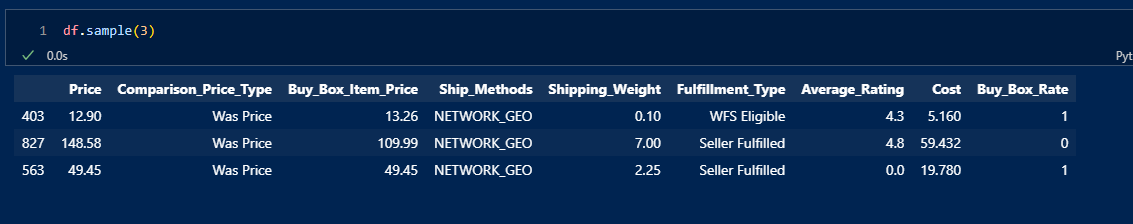

Modelimiz verilen 4 veri icin ilk veri icin 1. , 2. ve 4. veriler icin sifir yani fiyatin olumsuz oldugunu, 3. veriler icin 1 i fiyatin olumlu yani buybox oranini alabilecegi sonucunu verdi. 